In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
# from small_script.myFunctions import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:

plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100


In [3]:
dataset = {"old":"1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", "),
            "new":"1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", "),
            "test":["t089", "t120", "t251", "top7", "1ubq", "t0766", "t0778", "t0782", "t0792", "t0803", "t0815", "t0833", "t0842", "t0844"]}
dataset["combined"] = dataset["old"] + dataset["new"]

dataset["membrane"] = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1rhz", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]
# pdb_list, steps = dataset["old"]

def get_data(pre, pdb_list, simType="all_simulations", n_rum=30, rerun=1, formatName=True):
    # to get last 20 frame of each run
    _all = []
    for p in pdb_list:
        if formatName:
            name = p.lower()[:4]
        else:
            name = p
        for i in range(n_rum):
            for ii in range(rerun):
                location = pre + f"{simType}/{name}/simulation/{i}/{ii}/wham.dat"
                try:
                    tmp = pd.read_csv(location).tail(50).reset_index()
                    tmp.columns = tmp.columns.str.strip()
                    _all.append(tmp.assign(Run=i, Name=name, Rerun=ii))
                except Exception as e: 
                    print(e)
    data = pd.concat(_all)
    data["Run"] = "Run" + data["Run"].astype(str)
    return data

# pre = "/Users/weilu/Research/server/feb_2019/optimization_iter1/database/2gb1/"
# fileName = "movie.pdb"
def splitPDB(pre, fileName):
    location = f"{pre}/{fileName}"
    with open(location, "r") as f:
        a = f.readlines()
    i = 0
    tmp = ""
    for line in a:
        tmp += line
    #     os.system(f"echo '{line}' >> {pre}frame{i}")
        if line == "END\n":
            with open(f"{pre}frame{i}.pdb", "w") as out:
                out.write(tmp)
            i += 1
            tmp = ""


import subprocess
def getFromTerminal(CMD):
    return subprocess.Popen(CMD,stdout=subprocess.PIPE,shell=True).communicate()[0].decode()
def getSize(p):
    protein = p.lower()[:4]
    pre = f"/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/all_simulations/{protein}/{protein}/ssweight"
    a = getFromTerminal(f"wc {pre}")
#     print(a)
    n = int(a.split()[0])
    return n


In [5]:
pdb_list = dataset["membrane"]

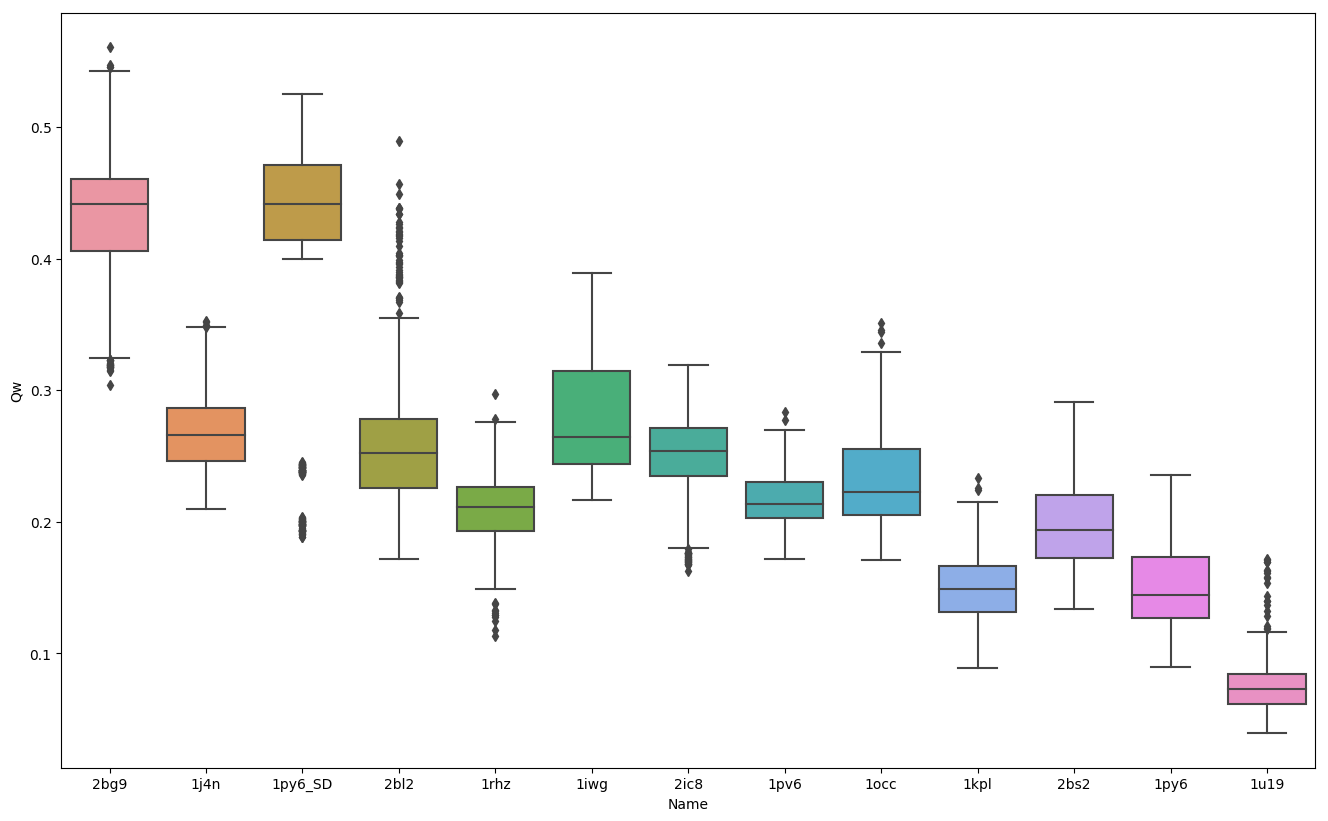

In [6]:
pre = "/Users/weilu/Research/server/jun_2019/"
folder = "membrane_protein_prediction_without_frag_with_helix_2"
pre = pre + folder + "/"
simulationType = "first"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=10, rerun=1, formatName=False)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

In [ ]:
data1 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter0_test_set_05-06.csv", index_col=0)

data2 = pd.read_csv("/Users/weilu/Research/data/optimization/original_test_set_05-06.csv", index_col=0)
data3 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_constant_tc_test_set_05-13.csv", index_col=0)
data4 = pd.read_csv("/Users/weilu/Research/data/optimization/iter1_30_test_set_05-13.csv", index_col=0)
data5 = pd.read_csv("/Users/weilu/Research/data/optimization/iter2_30_test_set_06-03.csv", index_col=0)
data6 = pd.read_csv("/Users/weilu/Research/data/optimization/iter3_30_test_set_06-03.csv", index_col=0)

d = pd.concat([
                data2.assign(Scheme="original"), 
#                 data1.assign(Scheme="mutliSeq iter0"), 
                data3.assign(Scheme="mutliSeq iter0 constant tc"),
    
#     data4.assign(Scheme="iter1"),
    data5.assign(Scheme="iter2"),
    data6.assign(Scheme="iter3"),
              ])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)
# sns.boxplot("Qw", "Name", hue="Scheme", data=d)
_ = plt.xticks(rotation=30)